# Visualizing data

Importing relevant libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Main objectives
1. Check different ways of visualizing data 
2. Plot graphics that are useful and understandable

# Visualization #1

In [13]:
df_movies = pd.read_csv('https://gist.githubusercontent.com/omadson/770934cb0df9e2d2c3e8db031f1139a5/raw/4d181efc035b327d9d66256915951384517c603e/arrecadacao.csv')

df_movies.head()

,arrecadacao,titulo
0,7316746,Ferdinand
1,36169328,Jumanji: Welcome to the Jungle
2,19928525,Pitch Perfect 3
3,71565498,Star Wars: The Last Jedi
4,8805843,The Greatest Showman


Objective = plot a barplot of movie title x revenues

## Wrong Plot

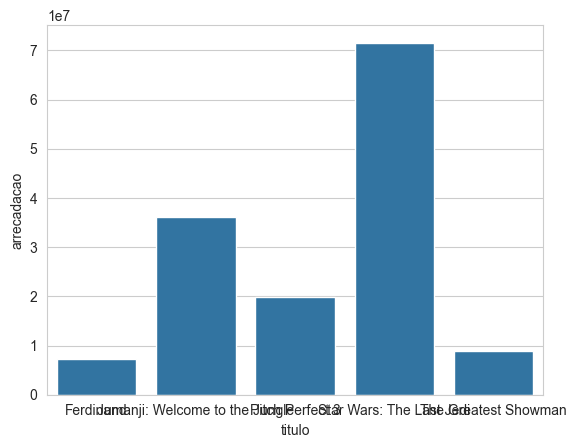

In [14]:
ax = sns.barplot(data=df_movies, x='titulo', y='arrecadacao')

It is possible to observe that the titles are too big, the variables are not sorted and the visualization, in general, is very bad

## Correct Plot

First, we improve the visualization by dividing the revenue values by 1 million (1e6) and sort the movies by its revenue

Creating a new column with these value representation

In [17]:
df_movies = df_movies.assign(millions_rev = df_movies.arrecadacao/1000000)

df_movies.head()

,arrecadacao,titulo,millions_rev
0,7316746,Ferdinand,7.316746
1,36169328,Jumanji: Welcome to the Jungle,36.169328
2,19928525,Pitch Perfect 3,19.928525
3,71565498,Star Wars: The Last Jedi,71.565498
4,8805843,The Greatest Showman,8.805843


Sorting the dataset

In [19]:
df_movies = df_movies.sort_values(by='arrecadacao', ascending=False)

df_movies.head()

,arrecadacao,titulo,millions_rev
3,71565498,Star Wars: The Last Jedi,71.565498
1,36169328,Jumanji: Welcome to the Jungle,36.169328
2,19928525,Pitch Perfect 3,19.928525
4,8805843,The Greatest Showman,8.805843
0,7316746,Ferdinand,7.316746


### Now, plotting what is desired

Adding a grid to the plot

In [20]:
sns.set_style('whitegrid')

Since the movie names are big, the best way of plotting these features is with an horizontal barplot

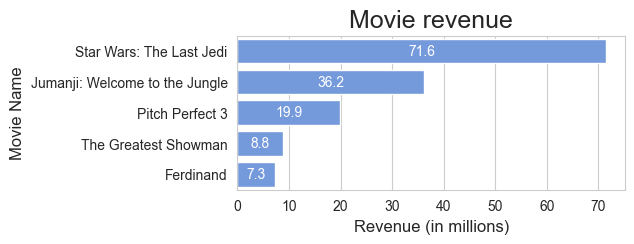

In [32]:
plt.figure(figsize=(5,2))

ax = sns.barplot(data=df_movies, x='millions_rev', y='titulo', color='cornflowerblue')
ax.set_title('Movie revenue',fontsize=18)
ax.set_xlabel('Revenue (in millions)', fontsize=12)
ax.set_ylabel('Movie Name', fontsize=12)

#adding values to each bar to improve visualization
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)

plt.show()

Now, we have a plot that brings useful information in an understandable way. 

# Visualization #2 

In [2]:
df_penguins = sns.load_dataset('penguins')

df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Objective = plot a histogram of the feature body_mass_g (body mass in grams)

## Wrong Plot

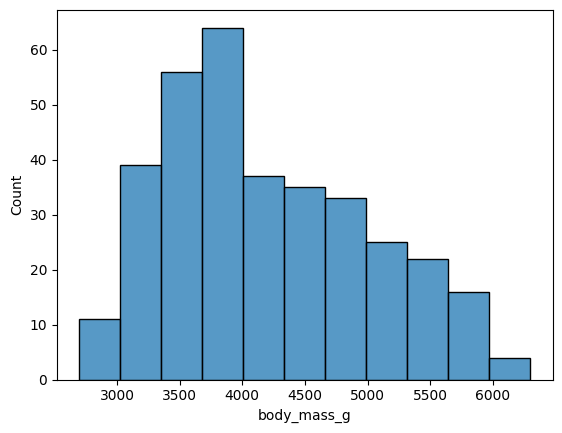

In [3]:
ax = sns.histplot(data=df_penguins, x='body_mass_g')

The bins aren't correctly aligned with the x axis, and the graph isn't very understandable

## Correct Plot

Setting a grid to the plots

In [4]:
sns.set_style('whitegrid')

Plotting correctly and in a better way of visualizing it

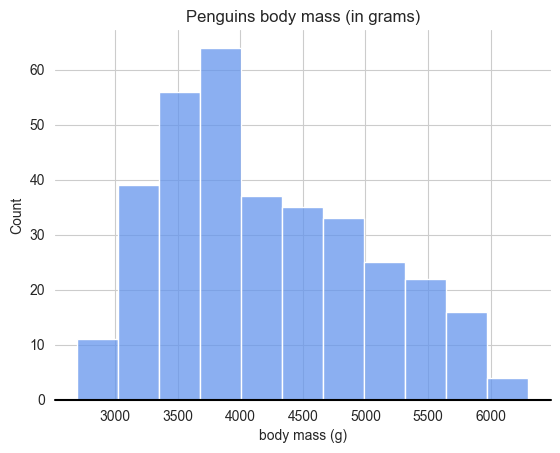

In [5]:
ax = sns.histplot(data=df_penguins, x='body_mass_g',color='cornflowerblue')
ax.set_title('Penguins body mass (in grams)')
ax.set_xlabel('body mass (g)')
ax.set_ylabel('Count')

ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)

plt.show()

Finding the maximum and minimum values to set the bin limit

In [6]:
print(df_penguins['body_mass_g'].min())
print(df_penguins['body_mass_g'].max())

2700.0
6300.0


Another way of visualizing is:

Now, we have a real view of the distributions, which range approximately from 500 to 500 (except on both of the limits) and are able to see that most of the penguins have a body mass that ranges between 3500 and 4000 grams

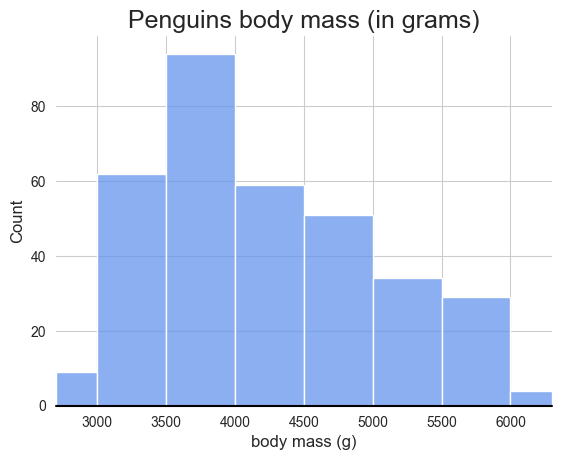

In [7]:
ax = sns.histplot(data=df_penguins, x='body_mass_g',color='cornflowerblue', bins=[2700,3000,3500,4000,4500,5000,5500,6000,6300])
ax.set_title('Penguins body mass (in grams)', fontsize=18)
ax.set_xlabel('body mass (g)',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.set_xlim(2700,6300)

ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)

plt.show()

# Visualization #3

In [8]:
df_tips = sns.load_dataset('tips')

df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Objective = plot a histogram of total bill per day

## Wrong Plot

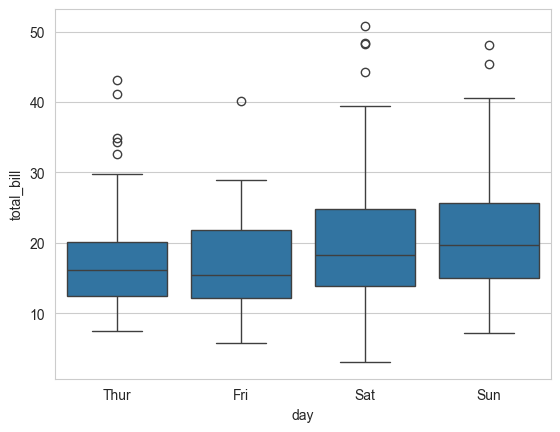

In [9]:
ax = sns.boxplot(data=df_tips, x='day', y='total_bill')

We can improve this plot by adjusting its color, labels, figure size... 

## Correct Plot

In [10]:
sns.set_style('whitegrid')

Text(0, 0.5, 'Bill price')

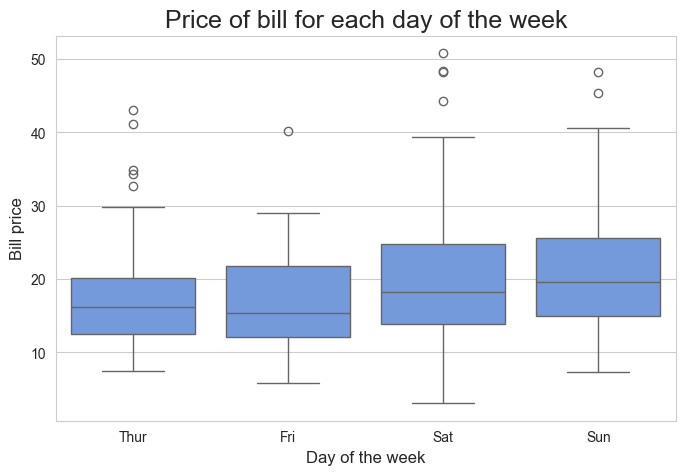

In [11]:
plt.figure(figsize=(8,5))

ax = sns.boxplot(data=df_tips, x='day', y='total_bill', color='cornflowerblue')
ax.set_title('Price of bill for each day of the week',fontsize=18)
ax.set_xlabel('Day of the week', fontsize=12)
ax.set_ylabel('Bill price', fontsize=12)

This plot brings information that is easier to visualize.